In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/testdata.manual.2009.06.14.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [21]:

train = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',delimiter=',', encoding='ISO-8859-1')
test=pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',delimiter=',', encoding='ISO-8859-1')


In [22]:
train

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [26]:
test

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
train_original=train.copy()
test_original=test.copy()

In [28]:
#EDA
train.dtypes

textID               object
text                 object
selected_text        object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020      int64
Land Area (Km²)     float64
Density (P/Km²)       int64
dtype: object

In [29]:
test.dtypes

textID               object
text                 object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020    float64
Land Area (Km²)     float64
Density (P/Km²)     float64
dtype: object

In [30]:
#EDA
train.dtypes

textID               object
text                 object
selected_text        object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020      int64
Land Area (Km²)     float64
Density (P/Km²)       int64
dtype: object

In [31]:
test.dtypes

textID               object
text                 object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020    float64
Land Area (Km²)     float64
Density (P/Km²)     float64
dtype: object

In [32]:
train.apply(lambda x:sum(x.isnull()),axis=0)

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [34]:
train['text'].fillna(train['text'].mode()[0],inplace=True)
train['selected_text'].fillna(train['selected_text'].mode()[0],inplace=True)

In [35]:
train.apply(lambda x:sum(x.isnull()),axis=0)

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [36]:
test.apply(lambda x:sum(x.isnull()),axis=0)

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [38]:
train['sentiment'].count

<bound method Series.count of 0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object>

In [55]:
train['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

<Axes: title={'center': 'sentiment'}, xlabel='sentiment'>

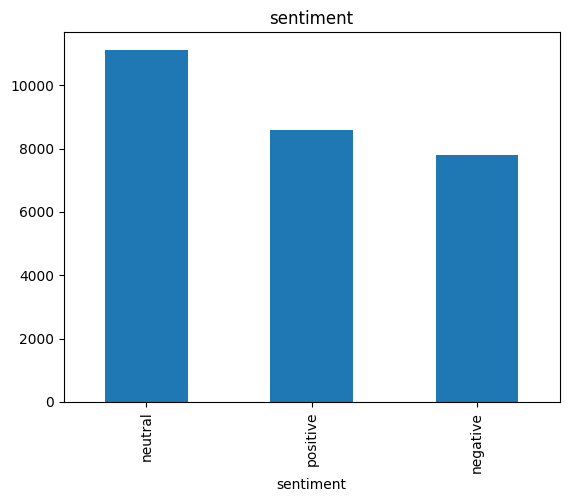

In [57]:
train['sentiment'].value_counts().plot.bar(layout=(15,15),title='sentiment')

<Axes: title={'center': 'Time of Tweet'}, xlabel='Time of Tweet'>

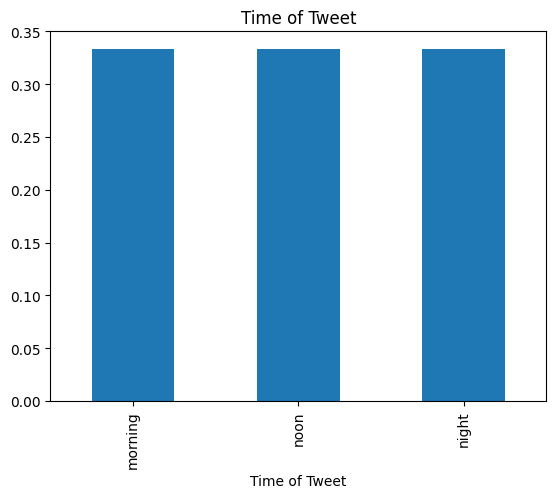

In [44]:
train['Time of Tweet'].value_counts(normalize=True).plot.bar(layout=(20,20),title='Time of Tweet')

<Axes: xlabel='sentiment', ylabel='count'>

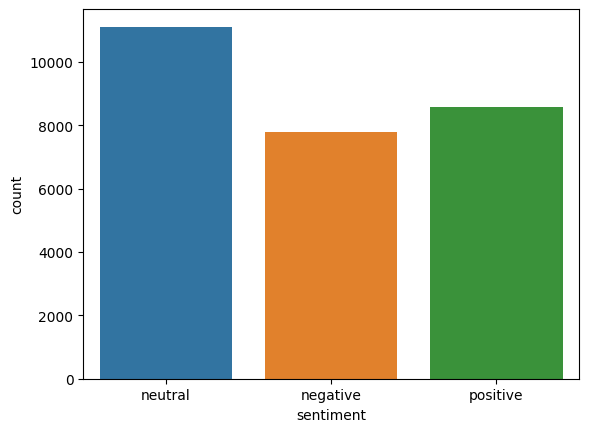

In [60]:
sns.countplot(x=train['sentiment'])

In [61]:
data_to_remove = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = train['text'].tolist()
print(len(corpus))


27481


In [62]:
print(corpus[0])

 I`d have responded, if I were going


In [64]:
print(corpus[2])

my boss is bullying me...


In [65]:
fin_corpus = []
fin_corpus_joined = []
for i in train.index:
    text = re.sub('[^a-zA-Z]', ' ', train['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    fin_corpus.append(text)
    fin_corpus_joined.append(text1)

In [67]:
fin_corpus[3]

['interview', 'leav', 'alon']

In [68]:
fin_corpus_joined[3]

'interview leav alon'

In [69]:
#data clean

d_c = pd.DataFrame()
d_c["text"] = fin_corpus_joined
d_c["sentiment"] = train["sentiment"].values



In [71]:
d_c

,text,sentiment
0,respond go,neutral
1,sooo sad miss san diego,negative
2,boss bulli,negative
3,interview leav alon,negative
4,son put releas alreadi bought,negative
...,...,...
27476,wish could come see u denver husband lost job ...,negative
27477,wonder rake client made clear net forc dev lea...,negative
27478,yay good enjoy break probabl need hectic weeke...,positive
27479,worth,positive


In [73]:
d_c.dtypes

text         object
sentiment    object
dtype: object

In [74]:
d_c.apply(lambda x :sum (x.isnull()),axis=0)

text         0
sentiment    0
dtype: int64

In [81]:
#This df is created for wordcloud only
d_eda = pd.DataFrame()
d_eda['text'] = fin_corpus
d_eda['sentiment'] = train['sentiment'].values
d_eda.head()
positive = d_eda[d_eda['sentiment'] == 'positive']
positive_list = positive['text'].tolist()
neutral = d_eda[d_eda['sentiment']=='neutral']
neutral_list = neutral['text'].tolist()
negative = d_eda[d_eda['sentiment'] == 'negative']
negative_list = negative['text'].tolist()

In [79]:
print(positive_list[0:20])

[['feed', 'babi', 'fun', 'smile', 'coo'], ['journey', 'wow', 'u', 'becam', 'cooler', 'hehe', 'possibl'], ['realli', 'realli', 'like', 'song', 'love', 'stori', 'taylor', 'swift'], ['play', 'ghost', 'onlin', 'realli', 'interest', 'new', 'updat', 'kirin', 'pet', 'metamorph', 'third', 'job', 'wait', 'dragon', 'pet'], ['free', 'fillin', 'app', 'ipod', 'fun', 'im', 'addict'], ['juss', 'came', 'backk', 'berkeleyi', 'omg', 'madd', 'fun', 'havent', 'minut', 'whassqoodd'], ['go', 'home', 'seen', 'new', 'twitter', 'design', 'quit', 'heaven'], ['hope', 'unni', 'make', 'audit', 'fight', 'dahy', 'unni'], ['funni', 'cute', 'kid'], ['littl', 'happi', 'wine', 'jeje', 'ok', 'sm', 'free', 'time', 'care', 'jaja', 'love', 'day'], ['im', 'avid', 'fan', 'magazin', 'love', 'magazin'], ['love', 'avail', 'pm', 'dear', 'would', 'love', 'help', 'convert', 'vid'], ['romanc', 'zero', 'funni'], ['better', 'way', 'spoil', 'mum', 'let', 'kick', 'back', 'relax', 'nice', 'meal', 'bottl', 'favorit', 'wine', 'wine', 'red'

In [80]:
print(negative_list[0:20])

[['sooo', 'sad', 'miss', 'san', 'diego'], ['boss', 'bulli'], ['interview', 'leav', 'alon'], ['son', 'put', 'releas', 'alreadi', 'bought'], ['sharpi', 'run', 'danger', 'low', 'ink'], ['want', 'go', 'music', 'tonight', 'lost', 'voic'], ['uh', 'oh', 'sunburn'], ['ok', 'tri', 'plot', 'altern', 'speak', 'sigh'], ['sick', 'past', 'day', 'thus', 'hair', 'look', 'wierd', 'didnt', 'hat', 'would', 'look', 'http', 'tinyurl', 'com', 'mnf', 'kw'], ['back', 'home', 'gonna', 'miss', 'everi', 'one'], ['sorri'], ['way', 'malaysia', 'internet', 'access', 'twit'], ['went', 'sleep', 'power', 'cut', 'noida', 'power', 'back', 'work'], ['consol', 'got', 'bmi', 'test', 'hahaha', 'say', 'obes', 'well', 'much', 'unhappi', 'minut'], ['born', 'rais', 'nyc', 'live', 'texa', 'past', 'year', 'still', 'miss', 'ny'], ['soooooo', 'sleeeeepi', 'last', 'day', 'school', 'today', 'sniffl'], ['egh', 'blah', 'boooooooooooo', 'dunno', 'wanna', 'go', 'work', 'hangov', 'suckkkkkk', 'im', 'drunk', 'mess'], ['donbt', 'like', 'pee

In [82]:
print(neutral_list[0:20])

[['respond', 'go'], ['http', 'www', 'dothebounci', 'com', 'smf', 'shameless', 'plug', 'best', 'ranger', 'forum', 'earth'], ['soooo', 'high'], [], ['much', 'love', 'hope', 'reckon', 'chanc', 'minim', 'p', 'never', 'gonna', 'get', 'cake', 'stuff'], ['test', 'test', 'lg', 'env'], ['hes'], ['oh', 'mar', 'sorri', 'hope', 'find', 'soon'], ['clean', 'hous', 'famili', 'com', 'later', 'today'], ['gotta', 'restart', 'comput', 'thought', 'win', 'suppos', 'put', 'end', 'constant', 'rebooti'], ['see', 'wat', 'mean', 'bout', 'foll', 'w', 'friiday', 'call', 'lose', 'f', 'llower', 'friday', 'smh'], ['ahhh', 'slept', 'game', 'gonna', 'tri', 'best', 'watch', 'tomorrow', 'though', 'hope', 'play', 'armi'], ['that', 'end', 'tear', 'fear', 'vs', 'eric', 'prydz', 'dj', 'hero', 'http', 'bit', 'ly', 'hpbg'], ['case', 'wonder', 'realli', 'busi', 'today', 'come', 'ad', 'ton', 'new', 'blog', 'updat', 'stay', 'tune'], ['car', 'happi', 'big', 'big', 'dent', 'boot', 'hope', 'theyr', 'go', 'write', 'cross', 'finger',

In [83]:
x=d_c['text']
y=d_c['sentiment']

In [85]:
#data modelling

from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2)



In [86]:


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred

array(['positive', 'negative', 'neutral', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [89]:
# Model Summary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.57      0.64      1549
     neutral       0.61      0.76      0.68      2189
    positive       0.78      0.68      0.72      1759

    accuracy                           0.68      5497
   macro avg       0.70      0.67      0.68      5497
weighted avg       0.70      0.68      0.68      5497



<Axes: ylabel='Count'>

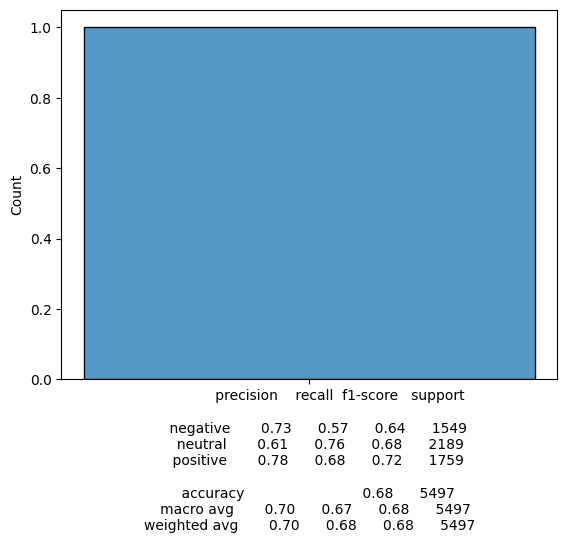

In [104]:
#visualising
sns.histplot(classification_report(y_test,y_pred))

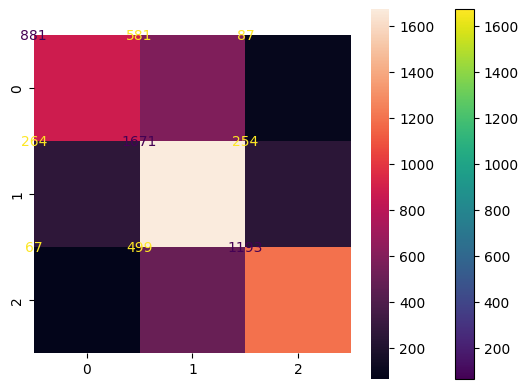

In [105]:
#visualising2
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()


[]

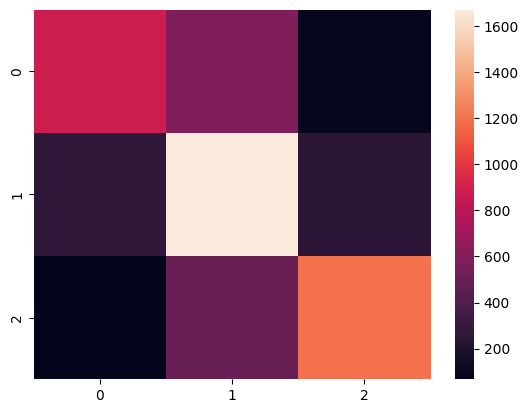

In [106]:
t2=sns.heatmap(confusion_matrix(y_test, y_pred))
t2.plot()